Notes:
1.   Need scaler, standard or min max?
2.   Regularization?
3.   stratified split?
4.   examine parameters more carefully
5.   Add recall, precision
6.   AOC, ROC





Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# from sklearn.neighbors import KNeighborsClassifier # sklearn.neighbors.KNeighborsClassifier



Load Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/derekchased/se.uu.statml/master/train.csv")

Explore Data

In [3]:
data.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [4]:
data.describe()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


Randomize Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc19ed4b90>,
      dtype=object)

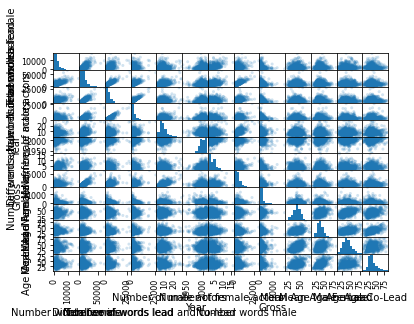

In [5]:
pd.plotting.scatter_matrix(data, alpha=0.2)

Split data into X and y

In [6]:
X = data.iloc[:,:-1]
y = pd.get_dummies(data["Lead"]).drop("Male", axis=1)

Examine Data

In [7]:
X.describe()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


In [8]:
y.describe()

,Female
count,1039.000000
mean,0.244466
std,0.429977
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


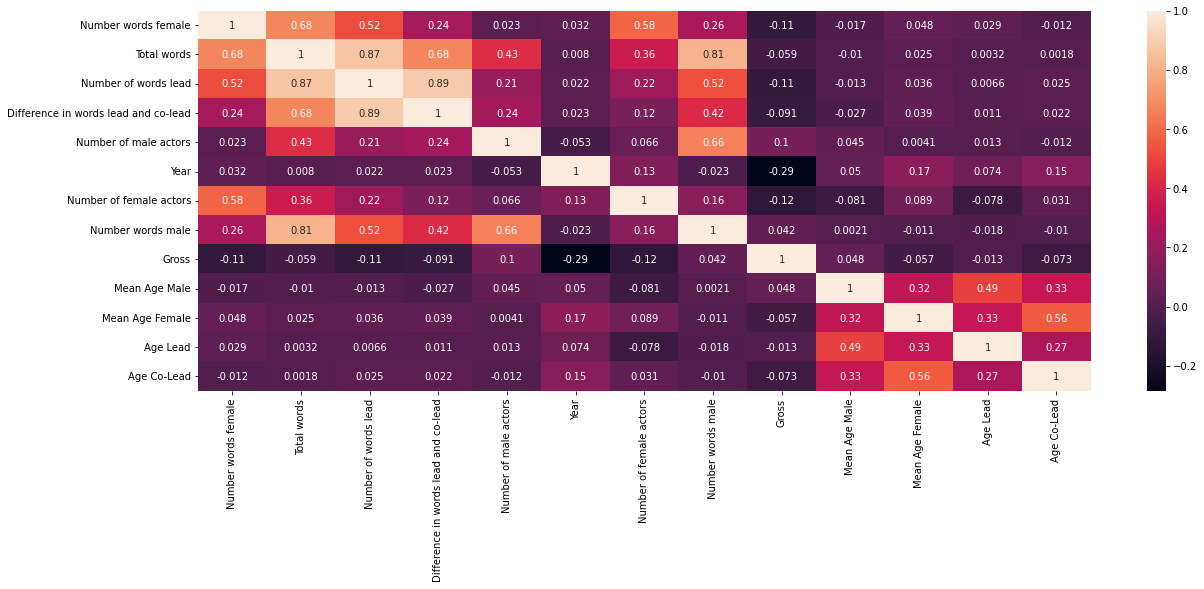

In [9]:
corr = X.corr()
plt.rcParams['figure.figsize'] = [20, 7]
sn.heatmap(corr, annot=True)
plt.show()

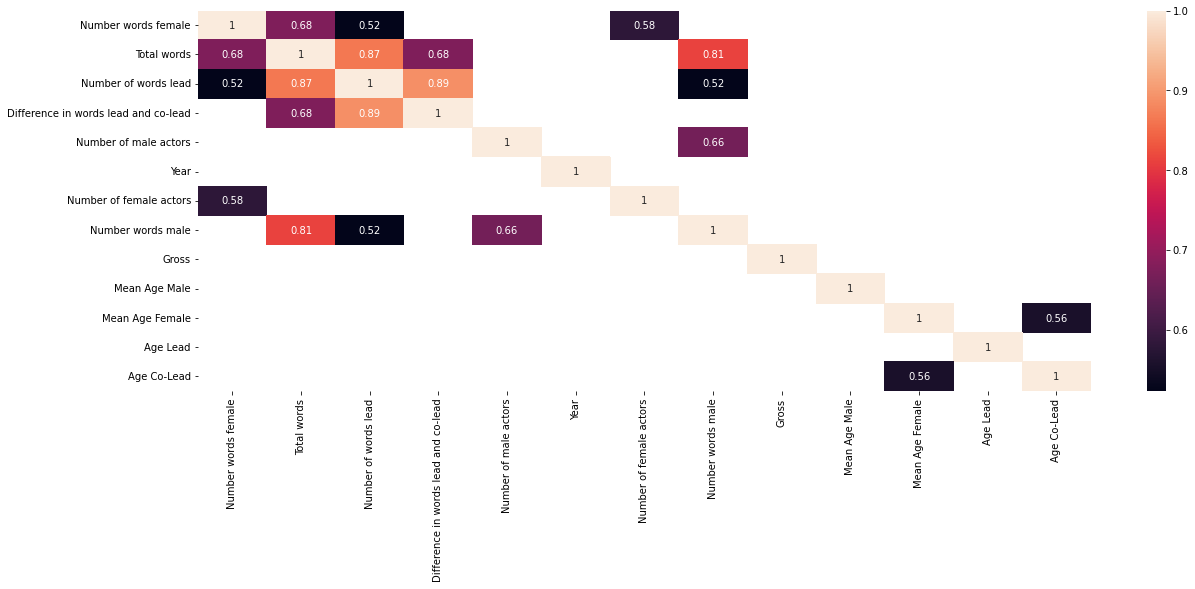

In [10]:
sn.heatmap(corr[  (corr <=-.5) |  (corr >= .5) ], annot=True)
plt.show()

Split Data into Train and Test

In [11]:
seed = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state = seed, stratify = y)



LDA

In [23]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.values.ravel())
scores = cross_val_score(lda, X_train, y_train.values.ravel(), cv=5)
print(f"cross val scores: {scores}, test score: {lda.score(X_test, y_test)}")

cross val scores: [0.84246575 0.84931507 0.85517241 0.8        0.86206897], test score: 0.8782051282051282


Predicted    0   1
Actual            
0          525  24
1           82  96


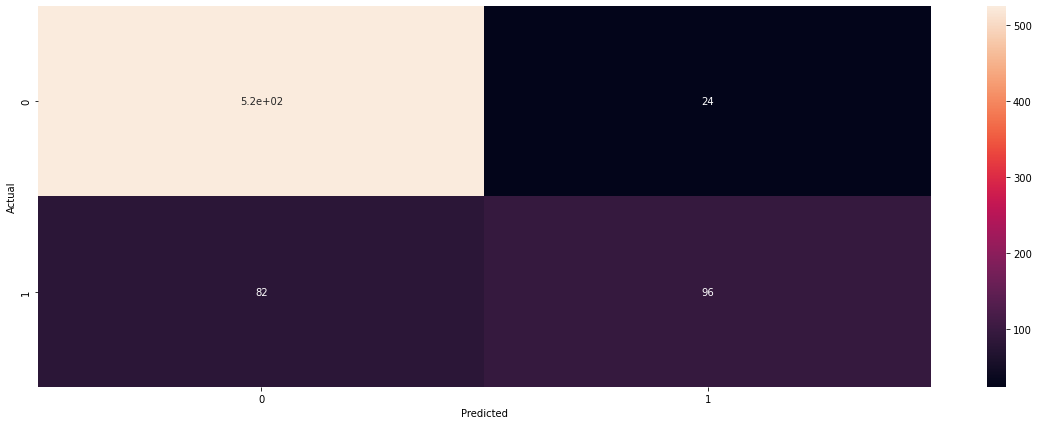

In [13]:
confusion_matrix = pd.crosstab(y_train.iloc[:,0], lda.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

Predicted    0   1
Actual            
0          225  11
1           27  49


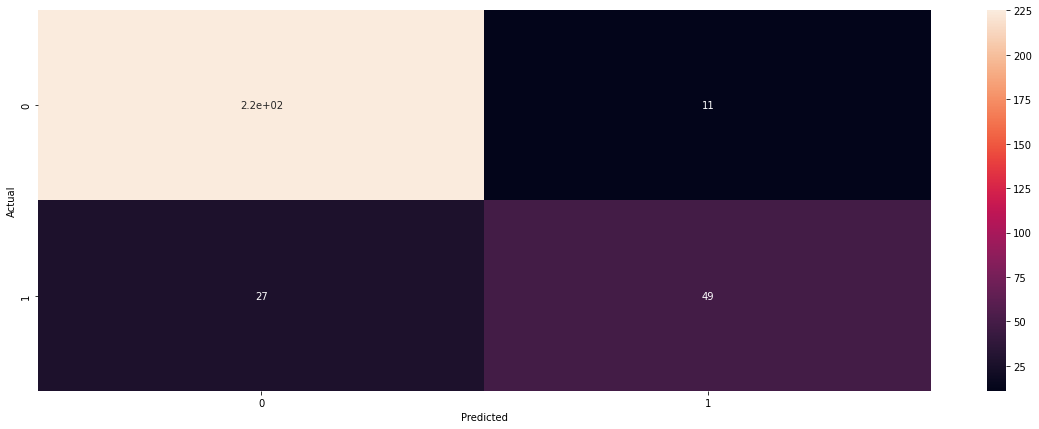

In [14]:
confusion_matrix = pd.crosstab(y_test.iloc[:,0], lda.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

QDA

In [33]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
scores = cross_val_score(qda, X_train, np.array(y_train), cv=5)
print(f"cross val scores: {scores}, test score: {qda.score(X_test, y_test)}")

cross val scores: [0.89726027 0.82191781 0.85517241 0.84827586 0.89655172], test score: 0.7596153846153846


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

Predicted    0    1
Actual             
0          386  163
1           13  165


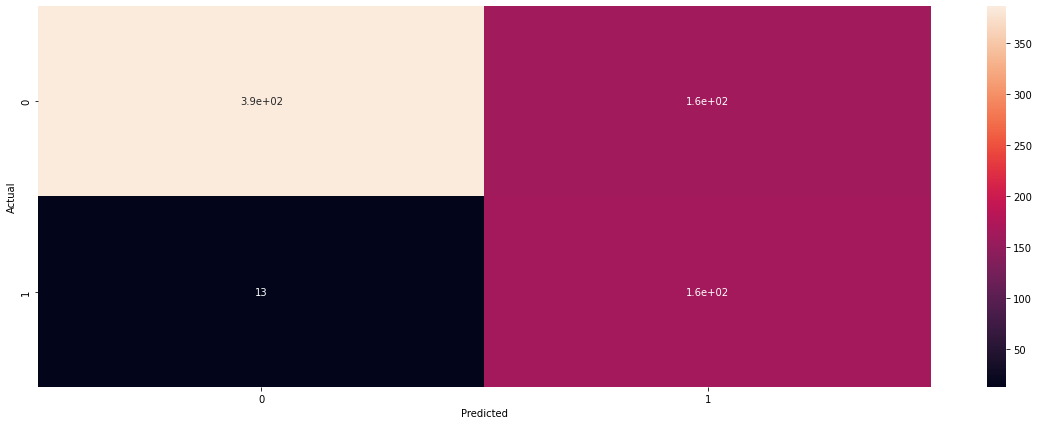

In [34]:
confusion_matrix = pd.crosstab(y_train.iloc[:,0], qda.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
plt.show()


Predicted    0   1
Actual            
0          169  67
1            8  68


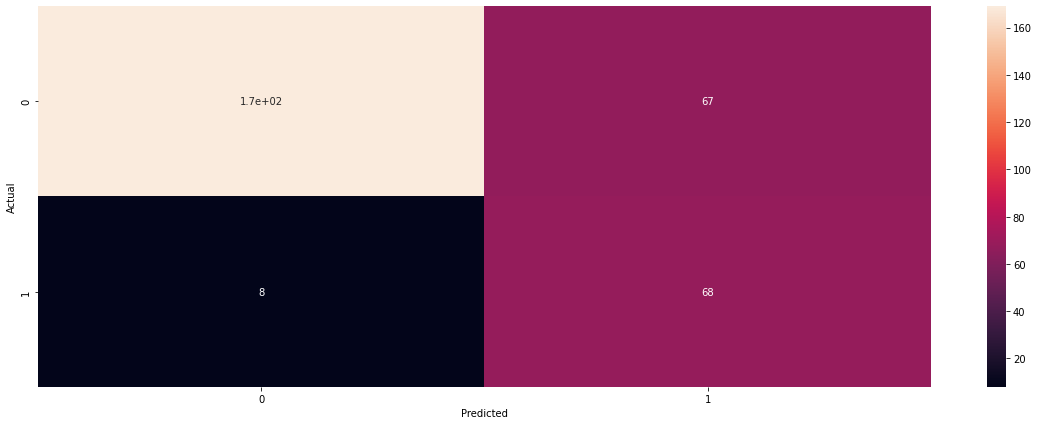

In [35]:
confusion_matrix = pd.crosstab(y_test.iloc[:,0], qda.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
plt.show()
